In [172]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tqdm

In [173]:
File_name = '12859_2019_2897_MOESM2_ESM.xlsx'

sheet_names = pd.ExcelFile(File_name).sheet_names
sheets = {}
for sheet in sheet_names:
    sheets[sheet] = pd.read_excel(File_name,sheet_name=sheet,index_col=0)
#load the graphs into a dictionary
graphs = {}
for sheet in sheet_names:
    graphs[sheet] = nx.from_pandas_adjacency(sheets[sheet],create_using=nx.DiGraph)

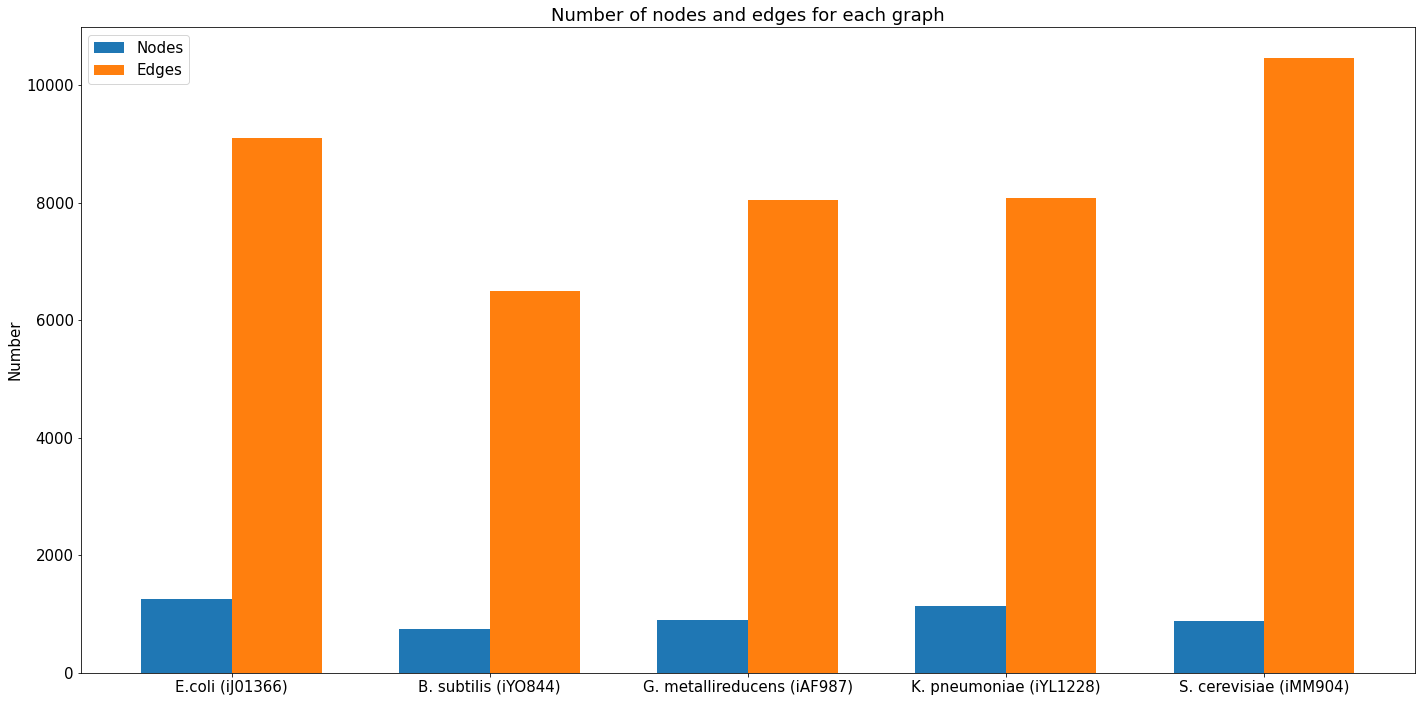

In [174]:
#plot the number of nodes and edges as a bar chart for each graph
edges = []
nodes = []
for sheet in sheet_names:
    edges.append(len(graphs[sheet].edges))
    nodes.append(len(graphs[sheet].nodes))
fig, ax = plt.subplots(figsize=(20,10))
x = np.arange(len(sheet_names))
width = 0.35
rects1 = ax.bar(x - width/2, nodes, width, label='Nodes')
rects2 = ax.bar(x + width/2, edges, width, label='Edges')
ax.set_ylabel('Number')
ax.set_title('Number of nodes and edges for each graph')
ax.set_xticks(x)
ax.set_xticklabels(sheet_names)
ax.legend()
plt.rcParams.update({'font.size': 15})

plt.show()


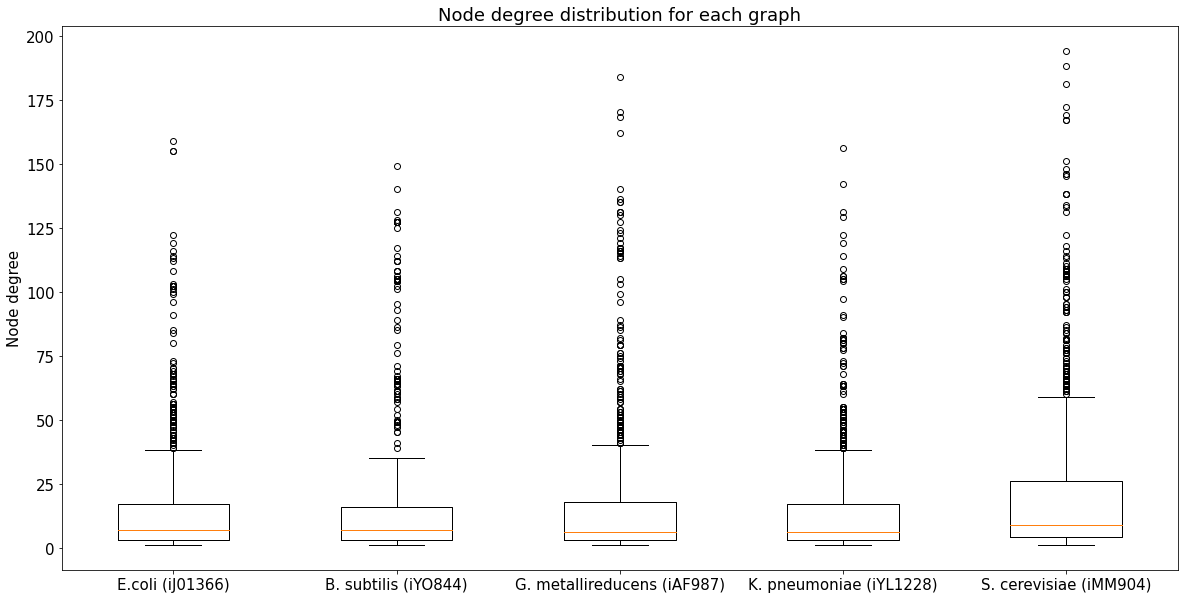

In [4]:
node_degrees = []
for sheet in sheet_names:
    node_degrees.append(list(dict(nx.degree(graphs[sheet])).values()))

fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(node_degrees)
ax.set_xticklabels(sheet_names)
ax.set_ylabel('Node degree')
ax.set_title('Node degree distribution for each graph')
plt.rcParams.update({'font.size': 15})
plt.show()


In [309]:
ecoli_bridging_centrality = nx.betweenness_centrality(graphs["E.coli (iJ01366)"], weight='weight', normalized = False)
ecoli_bridging_centrality_values = list(ecoli_bridging_centrality.values())
log10_unique_centrality_values = [np.log10(value + 1) for value in ecoli_bridging_centrality_values]

In [2]:
# len(log10_unique_centrality_values)
# log10_unique_centrality_values

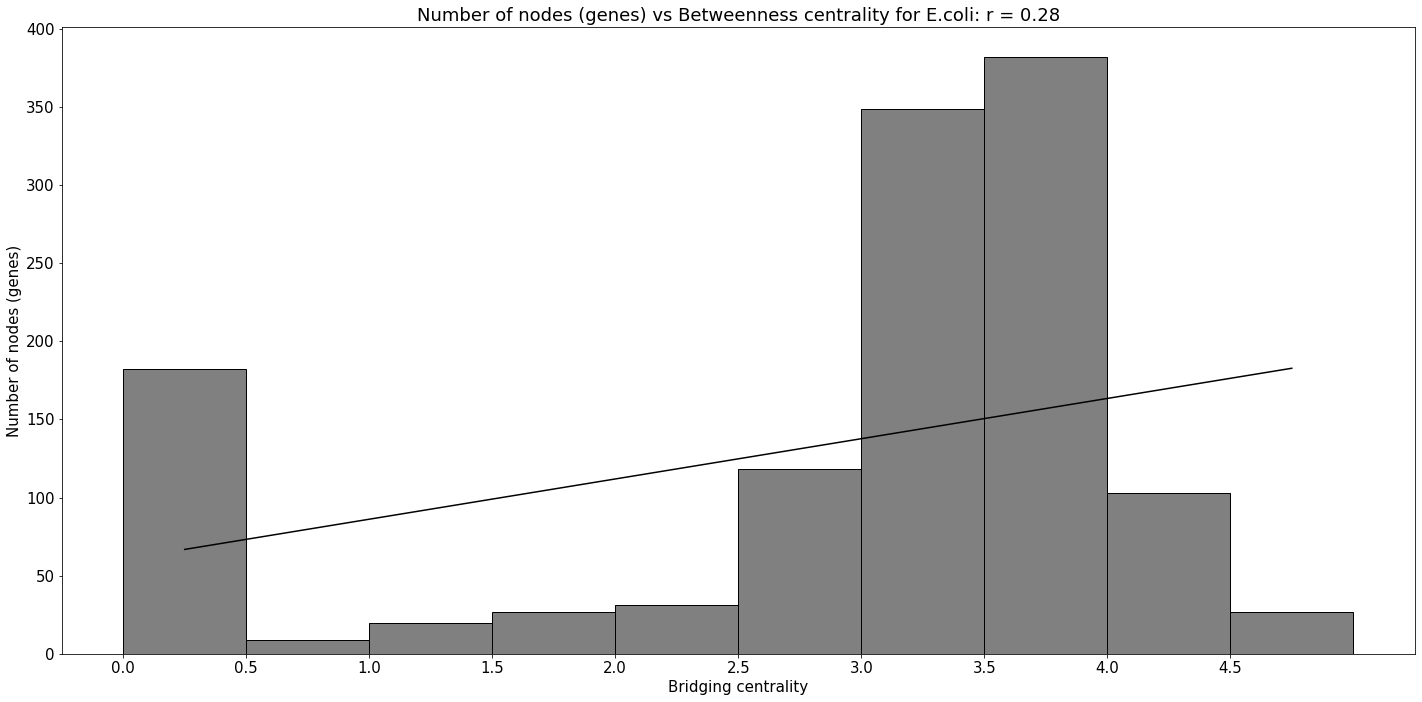

In [121]:
import numpy as np
from scipy.stats import linregress

fig, ax = plt.subplots(figsize=(20,10))

# bins = np.arange(0, 5.5, 0.5)
bins = np.arange(0, 5.5, 0.5)

hist_data, bin_edges = np.histogram(log10_unique_centrality_values, bins=bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# bin_centers=np.arange(0.0, 5, 0.5)

slope, intercept, r_value, p_value, std_err = linregress(bin_centers, hist_data)
x_values = np.linspace(min(bin_centers), max(bin_centers), 100)
y_values = slope * x_values + intercept
ax.hist(log10_unique_centrality_values, bins=bins, color='gray', edgecolor='black')
ax.plot(x_values, y_values, color='black')

ax.set_xlabel('Bridging centrality')
ax.set_ylabel('Number of nodes (genes)')
ax.set_title(f'Number of nodes (genes) vs Betweenness centrality for E.coli: r = {r_value:.2f}')
plt.rcParams.update({'font.size': 15})
plt.gca().set_xticks(np.arange(0, 5, 0.5))
plt.show()


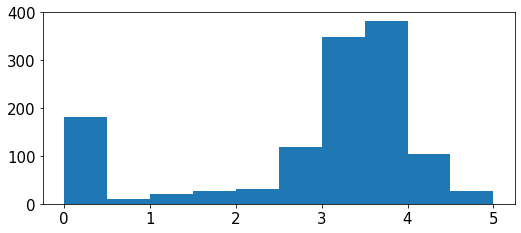

In [131]:
plt.hist(log10_unique_centrality_values, bins=np.arange(0, 5.5, 0.5))
# plt.gca().set_xticks()
plt.show()

In [152]:
df_f=[i for i in log10_unique_centrality_values if i<=2 and i>1.5]
len(df_f)

27

In [128]:
np.arange(0, 5.0, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [117]:
# pip install cobra
np.arange(0, 5.5, 0.5)
bin_centers
# (bin_edges[:-1] + bin_edges[1:])
np.arange(0.0, 5, 0.5)/2
np.arange(0, 5, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [239]:
import cobra
from cobra.io import read_sbml_model
from pathlib import Path
import os

#Fixing typo in supplimentary table from the paper
index = sheet_names.index("E.coli (iJ01366)")
sheet_names[index] = "E.coli (iJO1366)"


Micro_models = {}
for sheet in sheet_names:
    model_name = sheet.split('(')[1].split(')')[0]
    model_path = Path('Data/'+model_name+'.xml')
    if os.path.isfile(model_path):
        Micro_models[sheet] = read_sbml_model(str(model_path))
    else:
        print(f"File {model_path} does not exist.")

In [223]:
Micro_models

{'E.coli (iJO1366)': <Model iJO1366 at 0x203830e6e80>,
 'B. subtilis (iYO844)': <Model iYO844 at 0x203859d48b0>,
 'G. metallireducens (iAF987)': <Model iAF987 at 0x20386585b80>,
 'K. pneumoniae (iYL1228)': <Model iYL1228 at 0x203867a6190>,
 'S. cerevisiae (iMM904)': <Model iMM904 at 0x20385dab6a0>}

In [177]:
# add cob(i)alamin to allowed nutrients list
# what does the prefix EX mean, shouldn't we use prefix M?
allowed_nutrients = ['EX_ca2_e', 'EX_cl_e', 'EX_co2_e', 'EX_cobalt2_e', 'EX_cu2_e', 'EX_fe2_e', 'EX_fe3_e', 'EX_glc__D_e', 'EX_h_e', 'EX_h2o_e', 'EX_h_e', 'EX_k_e', 'EX_mg2_e', 'EX_mn2_e', 'EX_mqn8_e', 'EX_na1_e', 'EX_nh4_e', 'EX_ni2_e', 'EX_o2_e', 'EX_sel_e', 'EX_slnt_e', 'EX_so4_e', 'EX_tungs_e', 'EX_zn2_e']
allowed_nutrients.append('EX_cbl1_e')
# allowed_nutrients=[i.replace("EX", "M") for i in allowed_nutrients]
len(allowed_nutrients)

25

In [287]:
# get model
ecoli_model=Micro_models["E.coli (iJO1366)"].copy()

__Note:__ In the bar graph above, the dots should represent the proportion of essential reactions relative to all reactions, however, doesn't this mean that smaller degree nodes might be more susceptible to outliers. A low number of essential reactions is required to generate a high percentage value.

In [338]:
import cobra
from cobra.io import read_sbml_model
from pathlib import Path
import os

# allowed nutrients are above
# allowed_nutrients = ['EX_ca2_e', 'EX_cl_e', 'EX_co2_e', 'EX_cobalt2_e', 'EX_cu2_e', 'EX_fe2_e', 'EX_fe3_e', 'EX_glc__D_e', 'EX_h_e', 'EX_h2o_e', 'EX_h_e', 'EX_k_e', 'EX_mg2_e', 'EX_mn2_e', 'EX_mqn8_e', 'EX_na1_e', 'EX_nh4_e', 'EX_ni2_e', 'EX_o2_e', 'EX_sel_e', 'EX_slnt_e', 'EX_so4_e', 'EX_tungs_e', 'EX_zn2_e']

# ecoli_model = Micro_models["E.coli (iJO1366)"]

# what does changing lower bound do?
for reaction in ecoli_model.exchanges:
    if reaction.id in allowed_nutrients:
        reaction.lower_bound = -1000
    #change this code so it only overrides when no value is given in the model

solution = ecoli_model.optimize()
fluxes=pd.DataFrame(solution.fluxes)

print('Growth rate: ', solution.objective_value)

Growth rate:  31.28217176986916


In [308]:
fluxes.loc["ALATA_L"]

fluxes   -18.186078
Name: ALATA_L, dtype: float64

In [337]:
rxn_df=ecoli_model.reactions.get_by_id("ASPTA")
old_bounds=rxn_df.bounds
rxn_df.knock_out()
solution=ecoli_model.optimize()
print('Growth rate: ', solution.objective_value)
rxn_df.bounds=old_bounds

Growth rate:  4.856313681866045e-13


In [283]:
# rxn_df=ecoli_model.reactions.get_by_id("ASPTA")

In [250]:
# ecoli_model.reactions.get_by_id("ASPTA")

In [249]:
# ecoli_model.remove_reactions(["ASPTA"])

In [248]:
# ecoli_model.add_reactions("ASPTA")

In [273]:
# create df and adjust index and column names
ecoli_graph_df=sheets["E.coli (iJ01366)"]
ecoli_graph_df.index=ecoli_graph_df.index.str.replace(" ", "")
ecoli_graph_df.columns=ecoli_graph_df.columns.str.replace(" ", "")

# make reaction correction
ecoli_graph_df.index=ecoli_graph_df.index.str.replace("THRA2i", "THRA2")
ecoli_graph_df.index=ecoli_graph_df.index.str.replace("THRAi", "THRA")
ecoli_graph_df.index=ecoli_graph_df.index.str.replace("PPK2r", "PPK2")
ecoli_graph_df.index=ecoli_graph_df.index.str.replace("SULRi", "SULR")

In [279]:
ecoli_graph_df.index=ecoli_graph_df.index.str.replace("SULRi", "SULR")

In [280]:
# leave one feature out (remove one reaction at a time) and compute growth rate
fba_ecoli_lofo={}
reactions=list(ecoli_graph_df.index)
# reactions=reactions[0:10]
for rxn in reactions:
    rxn_df=ecoli_model.reactions.get_by_id(rxn)
    old_bounds=rxn_df.bounds
    rxn_df.knock_out()
    solution=ecoli_model.optimize()
#     print('Growth rate: ', solution.objective_value)
    fba_ecoli_lofo[rxn]=solution.objective_value
    rxn_df.bounds=old_bounds
    
    #change this code so it only overrides when no value is given in the model
#     for reaction in ecoli_model_rmv_rxn.exchanges:
#         if reaction.id in allowed_nutrients:
#             reaction.lower_bound = -1000
            
#     solution = ecoli_model_rmv_rxn.optimize()
#     fba_ecoli_lofo[rxn]=solution.objective_value
#     ecoli_model.add_reactions(rxn)

In [313]:
fba_ecoli_lofo.get("SERAT")

3.03259344152531e-13

In [158]:
# ecoli_model.exchanges
ca2=ecoli_model.reactions.get_by_id("EX_ca2_e")
cobalt2=ecoli_model.reactions.get_by_id("EX_cobalt2_e")
ecoli_model.reactions.get_by_id("2AGPEAT120")
ecoli_model.remove_reactions

Reaction identifier,2AGPEAT120
Name,2-acyl-glycerophospho-ethanolamine acyltransferase (n-C12:0)
Memory address,0x203ee2efa30
Stoichiometry,"2agpe120_c + atp_c + ddca_c --> amp_c + pe120_c + ppi_c 2-Acyl-sn-glycero-3-phosphoethanolamine (n-C12:0) + ATP C10H12N5O13P3 + Dodecanoate (n-C12:0) --> AMP C10H12N5O7P + Phosphatidylethanolamine (didodecanoyl, n-C12:0) + Diphosphate"
GPR,b2836
Lower bound,0.0
Upper bound,1000.0


In [78]:
ca2
cobalt2

Reaction identifier,EX_cobalt2_e
Name,Co2+ exchange
Memory address,0x203ee17c760
Stoichiometry,cobalt2_e <=> Co2+ <=>
GPR,
Lower bound,-1000
Upper bound,1000.0


In [80]:
ecoli_model.exchanges
ecoli_model.genes.b0036

Gene identifier,b0036
Name,caiD
Memory address,0x203edecbdf0
Functional,True
In 2 reaction(s),"CRNCAR, CRNCDH"


In [50]:
solution

,fluxes,reduced_costs
EX_cm_e,0.000000,0.000000e+00
EX_cmp_e,0.000000,-2.812832e-01
EX_co2_e,476.424831,0.000000e+00
EX_cobalt2_e,-0.000782,0.000000e+00
DM_4crsol_c,0.006976,0.000000e+00
...,...,...
RNDR4,0.818529,-1.214306e-17
RNDR4b,0.000000,1.026631e-16
RNTR1c2,0.000000,-4.173080e-15
RNTR2c2,0.845150,5.551115e-17


In [70]:
fluxes=pd.DataFrame(solution.fluxes)

In [157]:
fluxes.loc["2AGPEAT120"]

fluxes    0.0
Name: 2AGPEAT120, dtype: float64

In [1]:
# list(fluxes.index.values)

In [206]:
fluxes.sort_values(by="fluxes")

,fluxes
PGK,-1000.000000
Htex,-1000.000000
FORtex,-1000.000000
H2Otex,-1000.000000
PGM,-946.213465
...,...
FORtppi,1000.000000
EX_for_e,1000.000000
EX_h2o_e,1000.000000
EX_h_e,1000.000000


In [270]:
fluxes.loc["THRA2"]

fluxes    0.0
Name: THRA2, dtype: float64

In [7]:
graphs["E.coli (iJ01366)"]

In [199]:
# create df and adjust index and column names
ecoli_graph_df=sheets["E.coli (iJ01366)"]
ecoli_graph_df.index=ecoli_graph_df.index.str.replace(" ", "")
ecoli_graph_df.columns=ecoli_graph_df.columns.str.replace(" ", "")

In [269]:
ecoli_graph_df.loc["THRA2i"]
# ecoli_graph_df

2AGPEAT120      0
APH120          0
FA120ACPHi      0
FACOAE120       0
LPLIPAL2A120    0
               ..
2DGULRx         0
2DGULRy         0
3AMACHYD        0
DOGULNR         0
MSAR            0
Name: THRA2i, Length: 1251, dtype: int64

Index(['2AGPEAT120', 'APH120', 'FA120ACPHi', 'FACOAE120', 'LPLIPAL2A120',
       'LPLIPAL2E120', 'LPLIPAL2G120', '2AGPGAT120', 'AACPS7', 'ACPPAT120',
       ...
       'POAACR', '3KGK', 'ASCBPL', 'LYXI', 'GOFUCR', '2DGULRx', '2DGULRy',
       '3AMACHYD', 'DOGULNR', 'MSAR'],
      dtype='object', length=1251)